In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [20]:
# Read and clean the data

In [21]:
df = pd.read_csv("datasets/Housing.csv")

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
df = df.drop(columns=["id", "date", "zipcode", "sqft_lot15", "sqft_living15"], axis=1)

In [28]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.308377,0.525136,0.702035,0.089661,0.256793,0.266370,0.397294,0.036361,0.667434,0.605567,0.323816,0.054011,0.126434,0.307003,0.021626
bedrooms,0.308377,1.000000,0.515932,0.576693,0.031713,0.175466,-0.006578,0.079543,0.028502,0.356978,0.477614,0.303112,0.154198,0.018850,-0.008913,0.129482
bathrooms,0.525136,0.515932,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042
sqft_living,0.702035,0.576693,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223
sqft_lot,0.089661,0.031713,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521
floors,0.256793,0.175466,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419
waterfront,0.266370,-0.006578,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910
view,0.397294,0.079543,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400
condition,0.036361,0.028502,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500
grade,0.667434,0.356978,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372


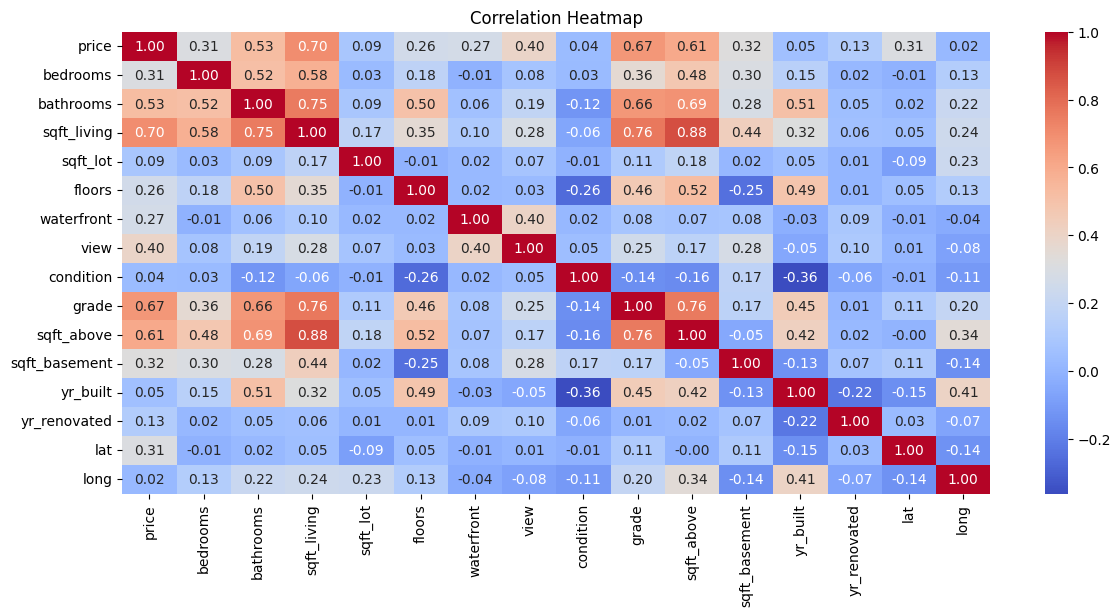

In [29]:
plt.figure(figsize=(14, 6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525136
view             0.397294
sqft_basement    0.323816
bedrooms         0.308377
lat              0.307003
waterfront       0.266370
floors           0.256793
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054011
condition        0.036361
long             0.021626
dtype: float64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>]], dtype=object)

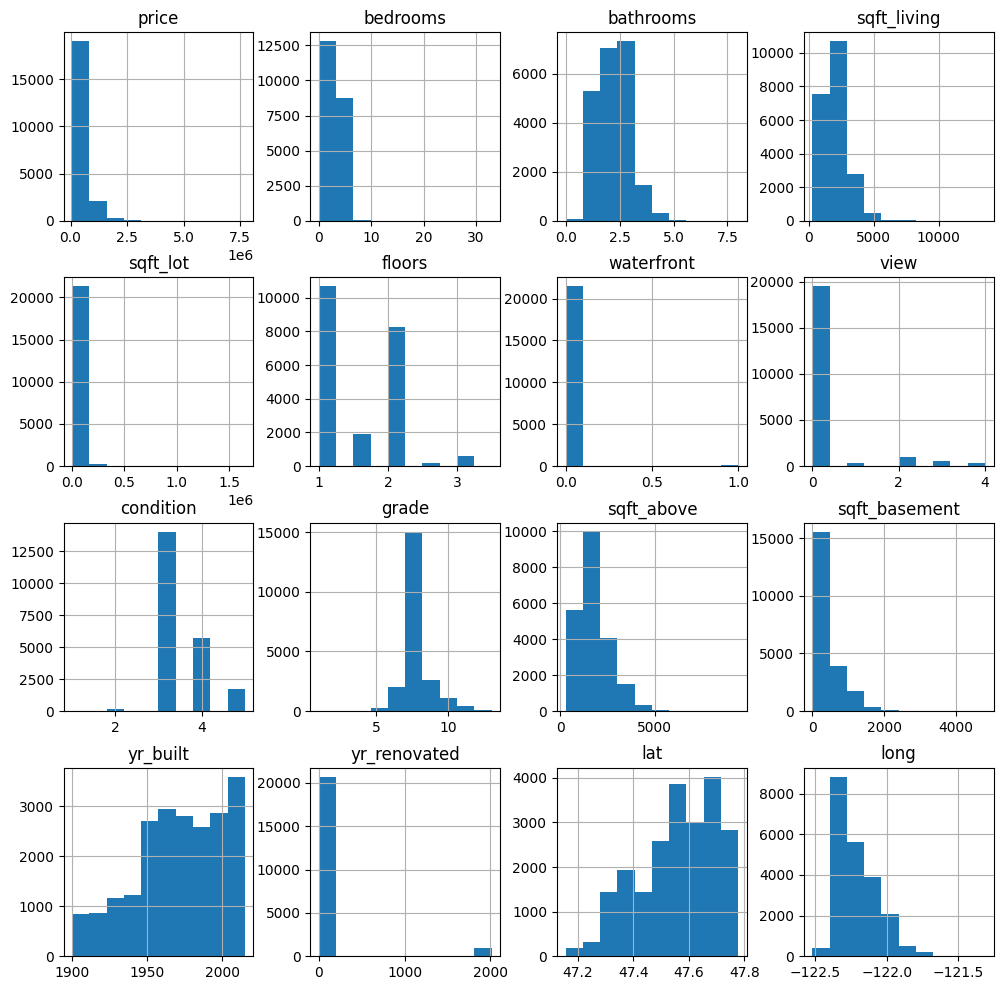

In [31]:
df.hist(figsize=(12, 12), bins=10)

<Axes: xlabel='long', ylabel='lat'>

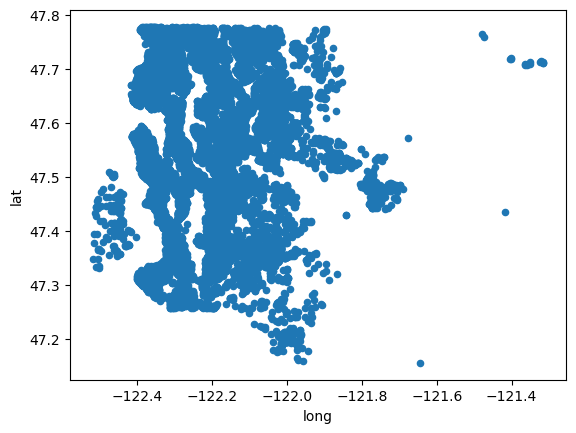

In [32]:
df.plot(kind="scatter", x="long", y="lat")

<Axes: xlabel='floors', ylabel='price'>

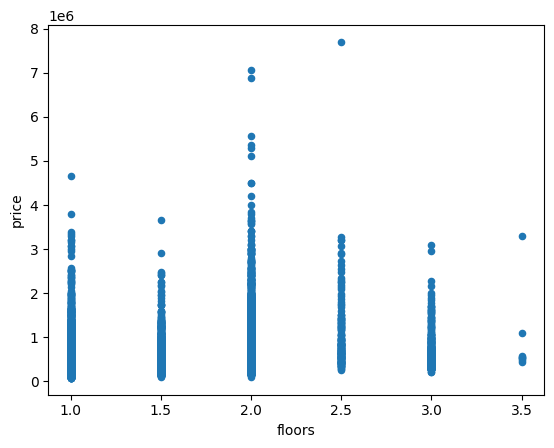

In [61]:
df.plot(kind="scatter", x="floors", y="price")

<Axes: xlabel='bedrooms', ylabel='price'>

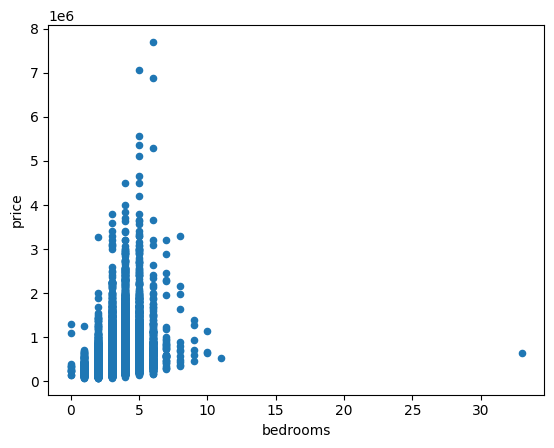

In [114]:
df.plot(kind="scatter", x="bedrooms", y="price")

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045


In [34]:
# Split data and train models

In [35]:
X, y = df.drop("price", axis=1), df["price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1)

In [37]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (19451, 15)
X_test shape (2162, 15)
y_train shape (19451,)
y_test shape (2162,)


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [39]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [40]:
# Linear Regression
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_score = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [43]:
print(f"Score = {round(lr_score, 2)}, mse = {round(mse,2)}")

Score = 0.68, mse = 46332070207.89


In [44]:
#DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor()

In [46]:
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [47]:
dtr_score = dtr.score(X_test_scaled, y_test)
y_pred_dtr = dtr.predict(X_test_scaled)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

In [48]:
print(f"Score = {round(dtr_score, 2)}, mse = {round(mse_dtr,2)}")

Score = 0.79, mse = 31138313173.52


In [49]:
# RandomForestRegressor

In [50]:
rfr = RandomForestRegressor(n_estimators=100)

In [51]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [52]:
rfr_score = rfr.score(X_test_scaled, y_test)
y_pred_rfr = rfr.predict(X_test_scaled)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

In [53]:
f"Score = {round(rfr_score,2)}, mse = {round(mse_rfr,2)}"

'Score = 0.88, mse = 17330443771.36'

In [54]:
# KNeighborsRegressor

In [55]:
knr = KNeighborsRegressor()

In [56]:
knr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [57]:
knr_score = knr.score(X_test_scaled, y_test)
y_pred_knr = knr.predict(X_test_scaled)
mse_knr = mean_squared_error(y_test, y_pred_knr)
print(f"Score = {round(knr_score,2)}, mse = {round(mse_knr,2)}")

Score = 0.77, mse = 33995547418.36


In [62]:
# ElasticNet

In [67]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [68]:
en.fit(X_train_scaled, y_train)

ElasticNet()

In [70]:
en_score = en.score(X_test_scaled, y_test)
y_pred_en = en.predict(X_test_scaled)
mse_en = mean_squared_error(y_test, y_pred_en)
print(f"Score = {round(en_score,2)}, mse = {round(mse_en,2)}")

Score = 0.65, mse = 51368768864.52


In [105]:
bar_labels = ["Linear Regression", "DecisionTreeRegressor", "RandomForestRegressor", "KNeighborsRegressor", "ElasticNet"]
score = [lr_score, dtr_score, rfr_score, knr_score, en_score]
mses = [mse, mse_dtr, mse_rfr, mse_knr, mse_en]
colors = ['red', 'green', 'blue', 'orange', "yellow"]

Text(0, 0.5, 'Losses')

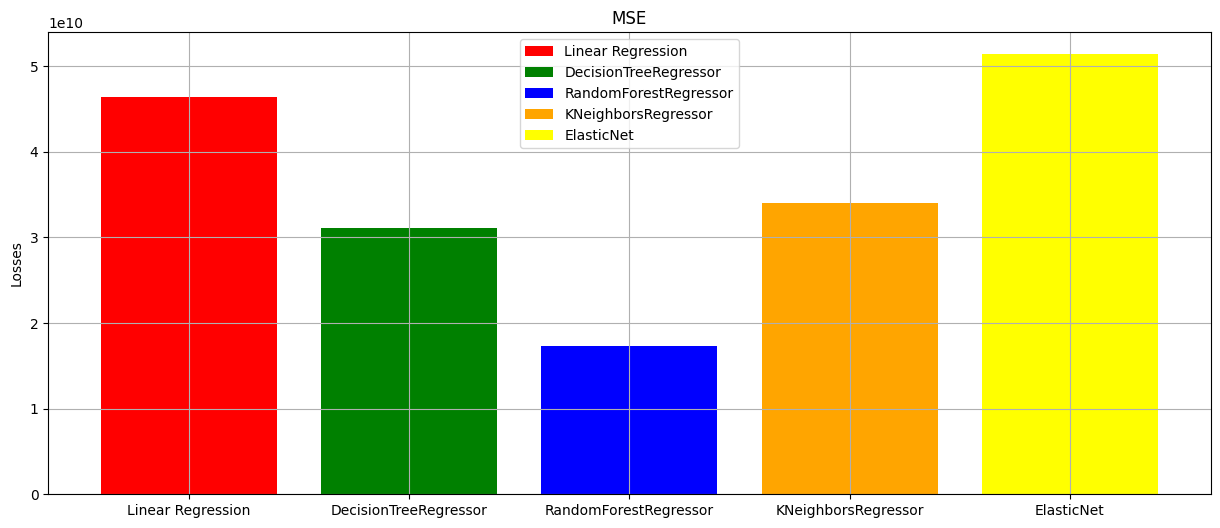

In [112]:
plt.figure(figsize=(15, 6))
plt.bar(bar_labels, mses, label=bar_labels, color=colors)
plt.grid(True)
plt.legend()
plt.title("MSE")
plt.ylabel("Losses")

Text(0, 0.5, 'Accuracy')

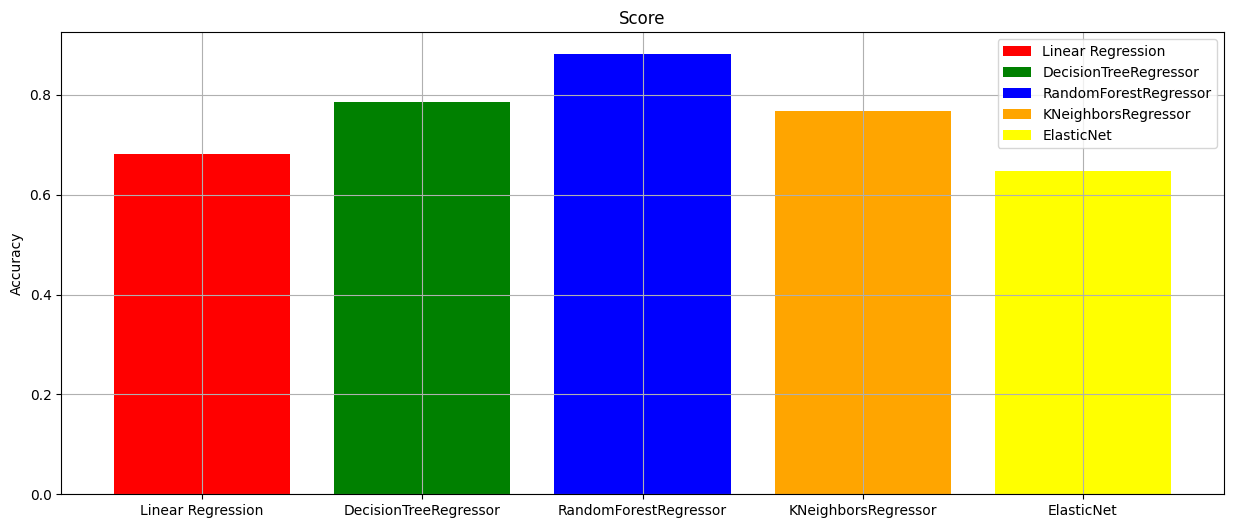

In [113]:
plt.figure(figsize=(15, 6))
plt.bar(bar_labels, score, label=bar_labels, color=colors)
plt.grid(True)
plt.legend()
plt.title("Score")
plt.ylabel("Accuracy")